# Data Mining in Physics - Presentation 2. - Braun 5.1: Monte-Carlo simulations

In [4]:
library(microbenchmark)
library(graphics)
library(ggplot2)

In [5]:
options(jupyter.plot_scale=1.4)

## 1. Expected value of dice rolls

In [6]:
set.seed(1)

In [7]:
roll_dice <- function(N) {
    
    x = sample(1:6, N, replace=TRUE)
    
    return(mean(x))
}

In [8]:
# Roll dices for N times and calculate mean of rolls
# Repeat for different N values sequentially
n = 5000
x = 1:n
# 
means = lapply(x, roll_dice)

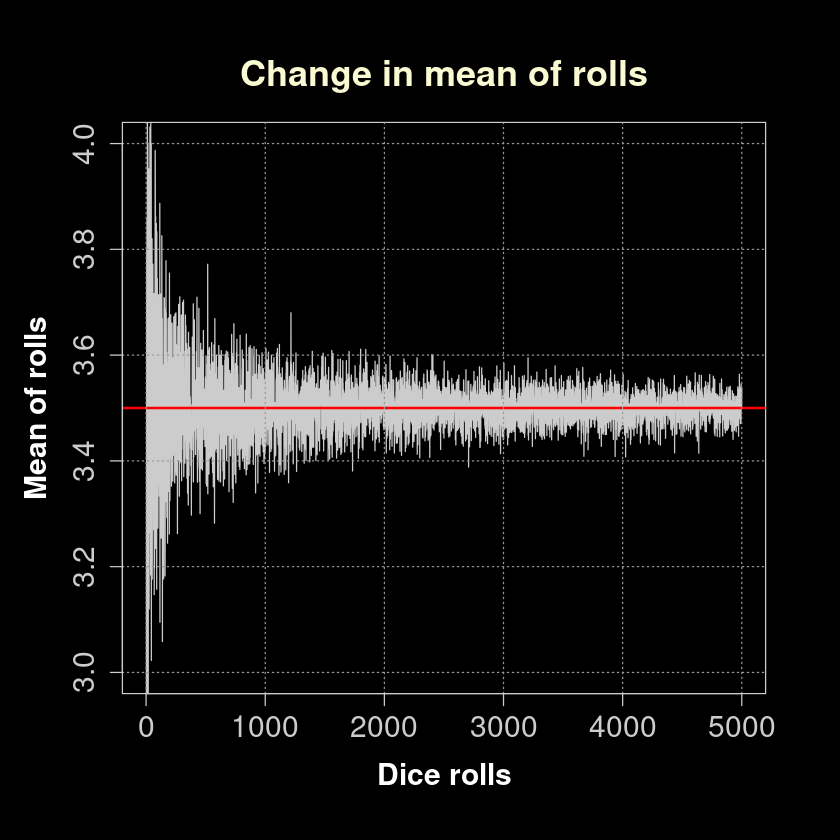

In [9]:
mar = 0.2
par(bg='black', fig=c(0, 1, 0, 1),
    omi=c(mar,mar,mar,mar))

plot(x, means,
     xaxt='n', yaxt='n',
     ylim=c(3,4),
     ann=FALSE, type='n')

box(col=gray(0.8))

lines(x, means, col=gray(0.8))
abline(h=3.5, col='red', lwd=2)

grid(nx=NULL, ny=NULL, lty=3, col=grey(0.6))

axis(1, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)
axis(2, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)

title(main='Change in mean of rolls',
      col.main='lightgoldenrodyellow', cex.main=1.8, font.main=2) 
title(xlab='Dice rolls', ylab='Mean of rolls',
      col.lab='white', cex.lab=1.5, font.lab=2)

## 2. Approximating $\pi$

In [10]:
generate_pi_df <- function(N, R) {
    #
    #Creates a set of coordinates with uniform distribution.
    #
    
    # Generate coordinates
    x = runif(N, 0, R)
    y = runif(N, 0, R)
    # Distance from (0,0)
    r = sqrt(x**2 + y**2)
    # The proportion of the # of points in the
    # inside and the outside
    mask = r <= R
    prop = 4 * cumsum(mask)/(1:N)
    # Mean of the proportions
    # This is the actual approximation for pi
    mean = cumsum(prop) / seq_along(prop)
    
    # Define DataFrame for coordinates
    df = data.frame(x=x,
                    y=y,
                    r=r,
                    prop=prop,
                    mean=mean)
    
    return(df)
}

### Benchamark `add_to_df` before running it too much

In [11]:
mb = microbenchmark(
    generate_pi_df(N=1000, R=1),
    times = 10000
)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



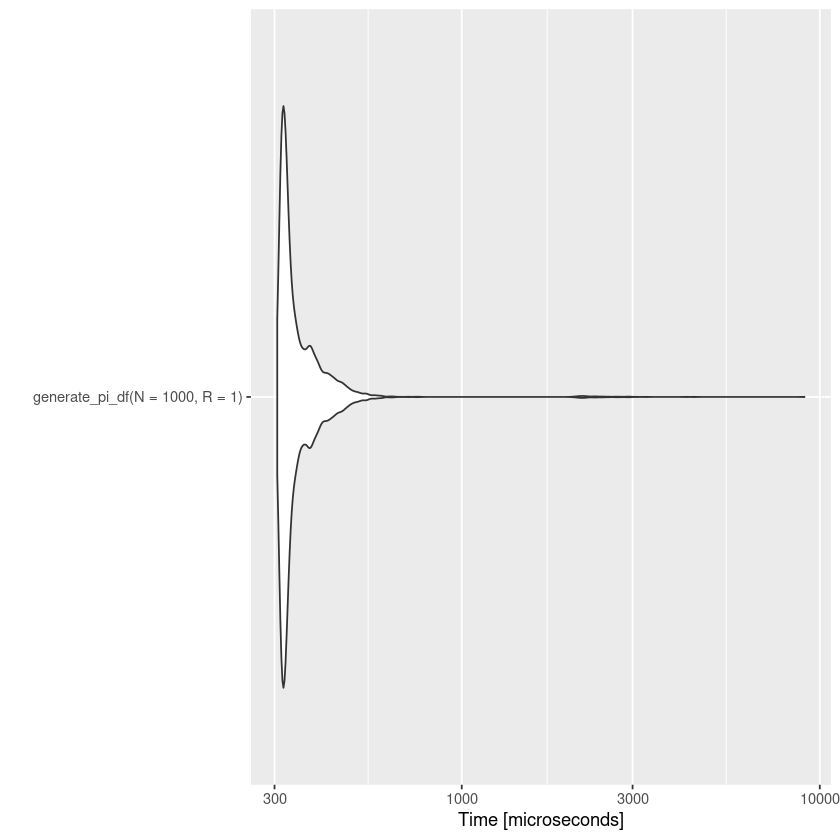

In [12]:
autoplot(mb)

### Generate random points

In [16]:
N = 3e03
R = 1

df = generate_pi_df(N=N, R=R)
print(sprintf("Approximation for pi : %.5f", tail(df$mean, 1)))

[1] "Approximation for pi : 3.14641"


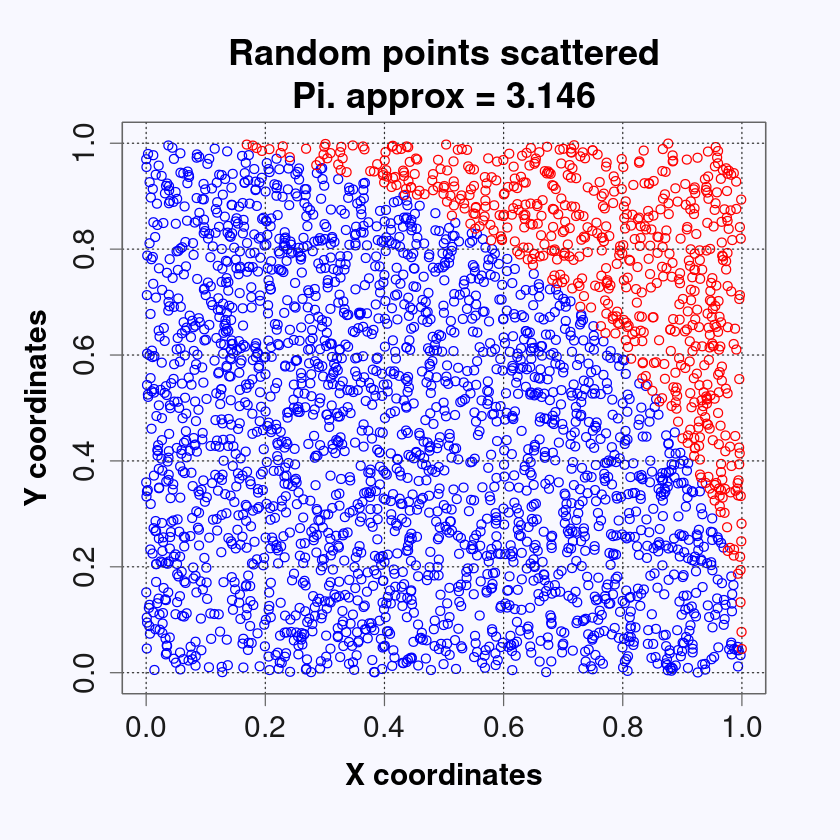

In [18]:
mar = 0.2
par(bg='ghostwhite', fig=c(0, 1, 0, 1),
    omi=c(mar,mar,mar,mar))

plot(df$x, df$y, 
     xaxt='n', yaxt='n',
     ann=FALSE, type='n')

ax_col = gray(0.4)
tick_col = gray(0.1)
box(col=ax_col)

points(df$x[df$r <= R], df$y[df$r <= R], col='blue')
points(df$x[df$r > R], df$y[df$r > R], col='red')

grid(nx=NULL, ny=NULL, lty=3, col=grey(0.2))

axis(1, col=ax_col, col.ticks=ax_col, col.axis=tick_col, cex.axis=1.5)
axis(2, col=ax_col, col.ticks=ax_col, col.axis=tick_col, cex.axis=1.5)

title(main=sprintf('Random points scattered\nPi. approx = %.3f', tail(df$mean, 1)),
      col.main='black', cex.main=1.8, font.main=2,
      xlab='X coordinates', ylab='Y coordinates',
      col.lab='black', cex.lab=1.5, font.lab=2)

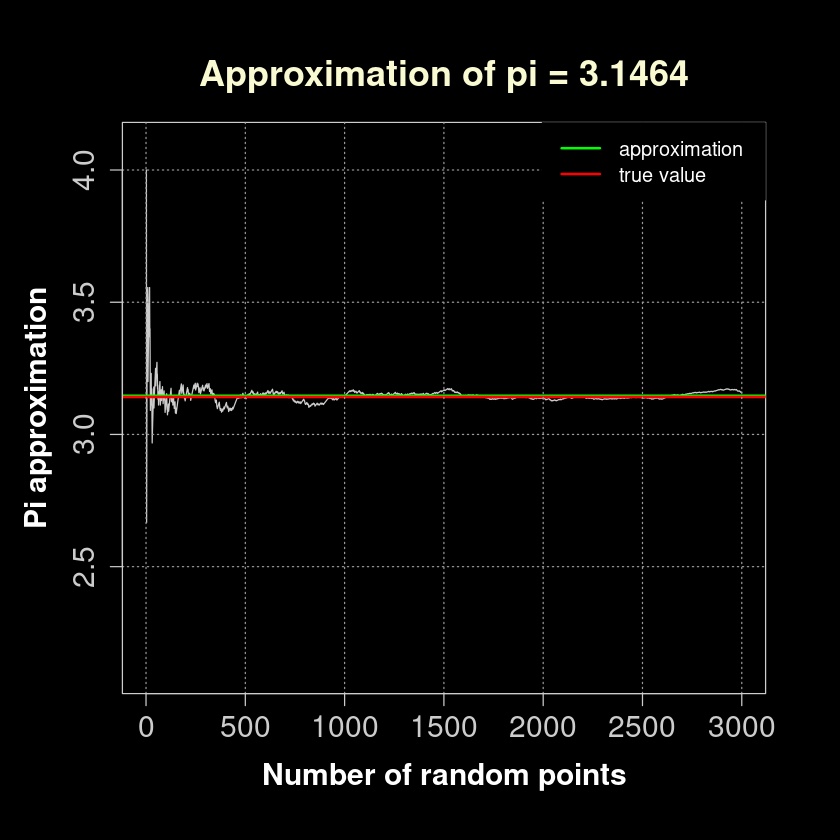

In [17]:
mar = 0.2
par(bg='black', fig=c(0, 1, 0, 1),
    omi=c(mar,mar,mar,mar))

plot(1:N, df$prop,
     xaxt='n', yaxt='n',
     ylim=c(2.1,4.1),
     ann=FALSE, type='n')

box(col=gray(0.8))

lines(1:N, df$prop, col=gray(0.8))
abline(h=tail(df$mean, 1), col='green', lwd=2)
abline(h=3.14159265358979323, col='red', lwd=2)

grid(nx=NULL, ny=NULL, lty=3, col=grey(0.6))

axis(1, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)
axis(2, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)

legend("topright", legend=c('approximation', 'true value'), lty=c(1,1), lwd=c(2,2),
       col=c('green', 'red'), text.col='white')

title(main=sprintf('Approximation of pi = %.4f', tail(df$mean, 1)),
      col.main='lightgoldenrodyellow', cex.main=1.8, font.main=2) 
title(xlab='Number of random points', ylab='Pi approximation',
      col.lab='white', cex.lab=1.5, font.lab=2)